In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [29]:
df = pd.read_csv('multiTimeline.csv',skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [31]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [32]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

In [33]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


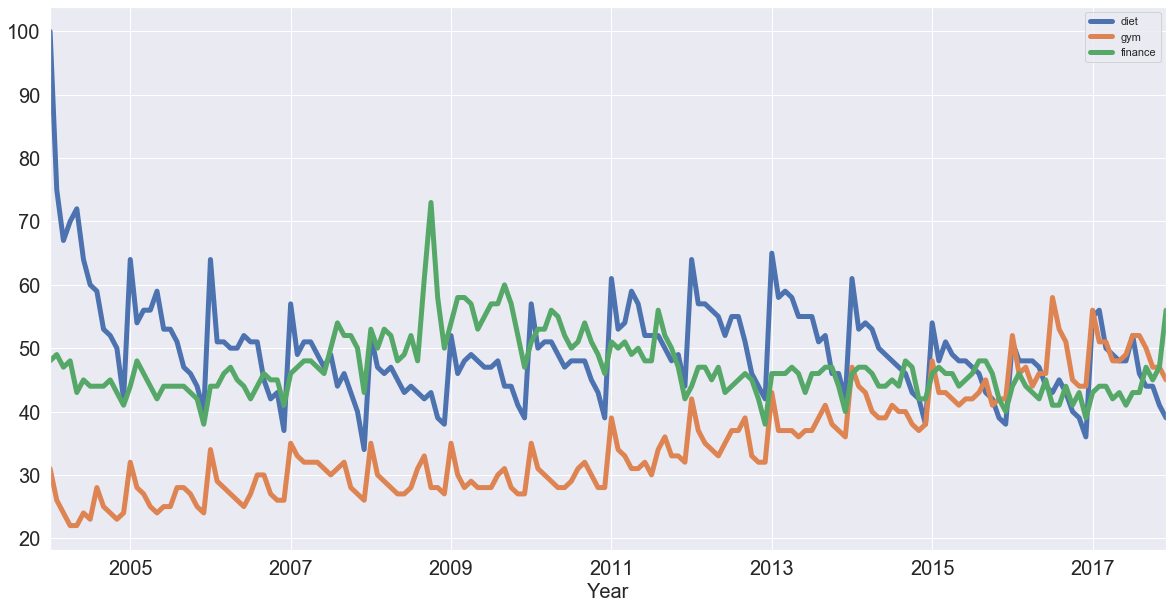

In [34]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

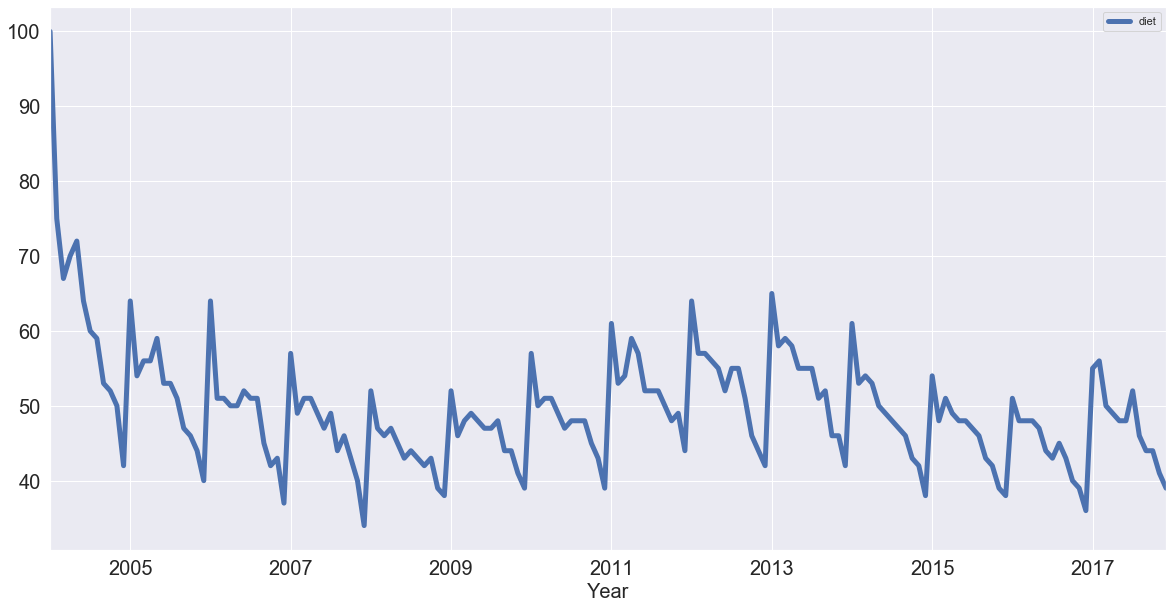

In [35]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

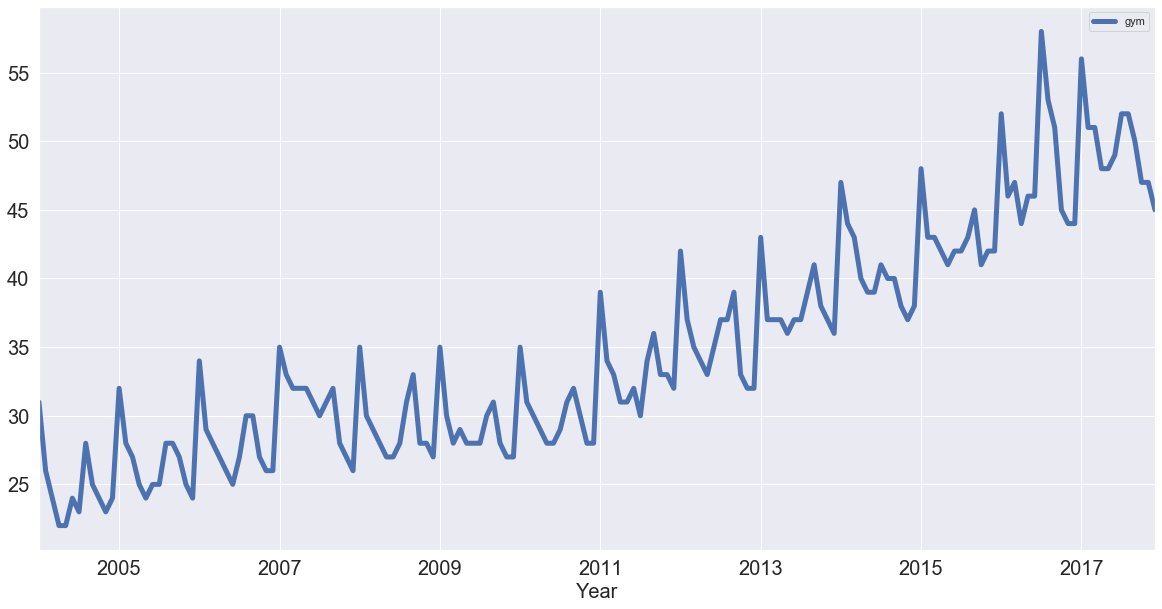

In [36]:
df[['gym']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

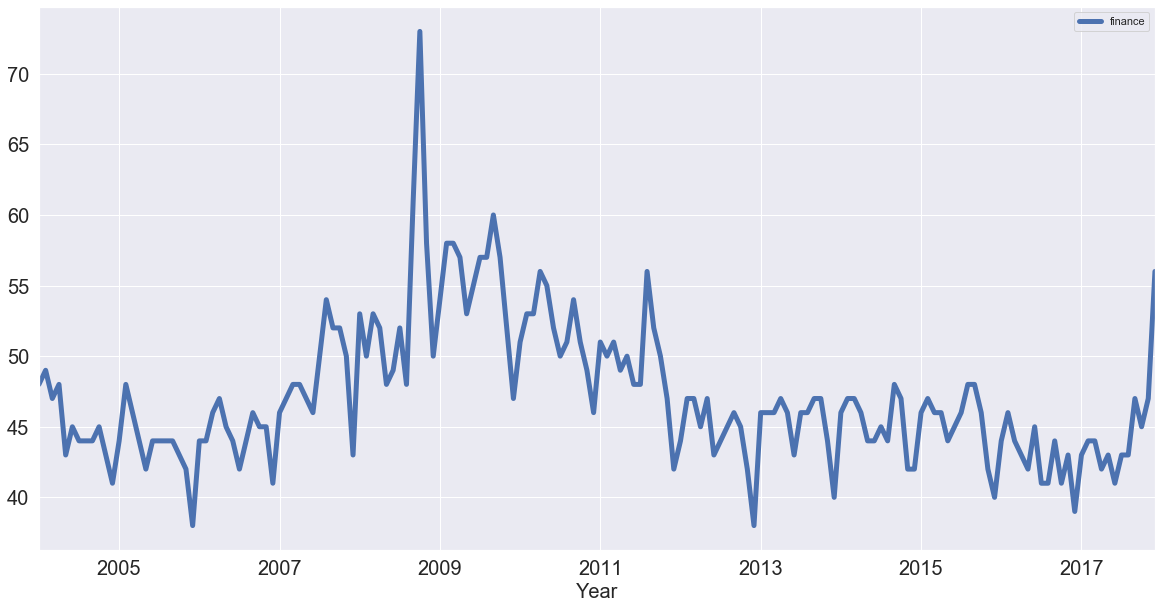

In [37]:
df[['finance']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

There are trends and seasonal components to these time series which we will find by taking the rolling average

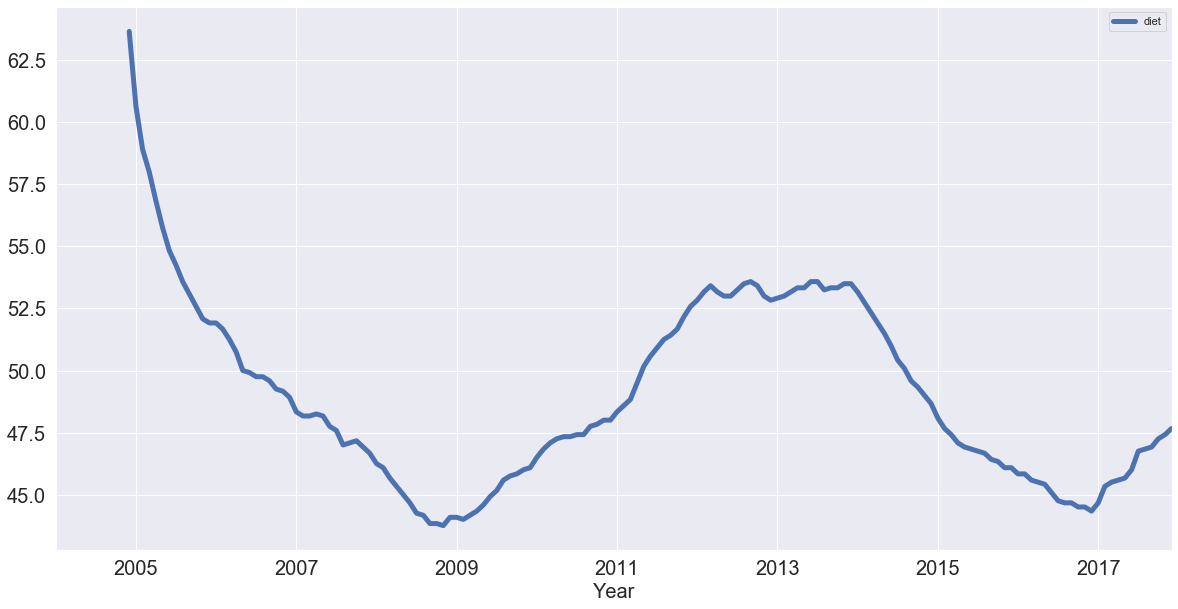

In [38]:
#Rolling mean for finding the trend (removing the seasonal component)

diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

'Diet' has some form of seasonality

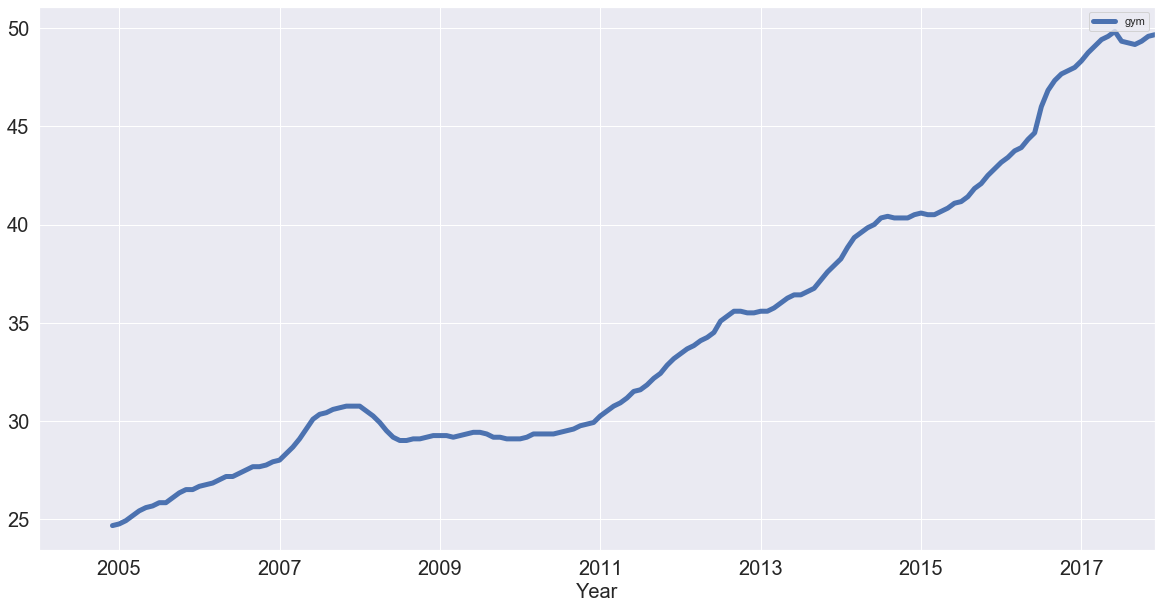

In [39]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

'Gym' has an increasing trend.

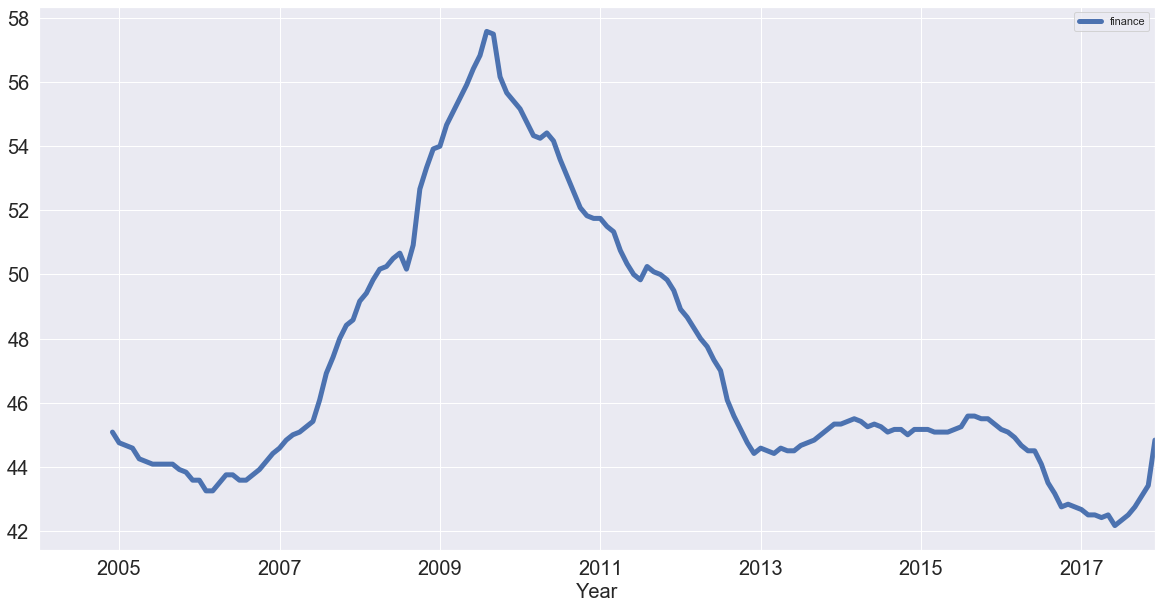

In [40]:
finance = df[['finance']]
finance.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

The trend in 'finance' is increasing at a rapid rate till a specific month of 2009 after which it is fell off rapidly and is taking slight rise and falls after that

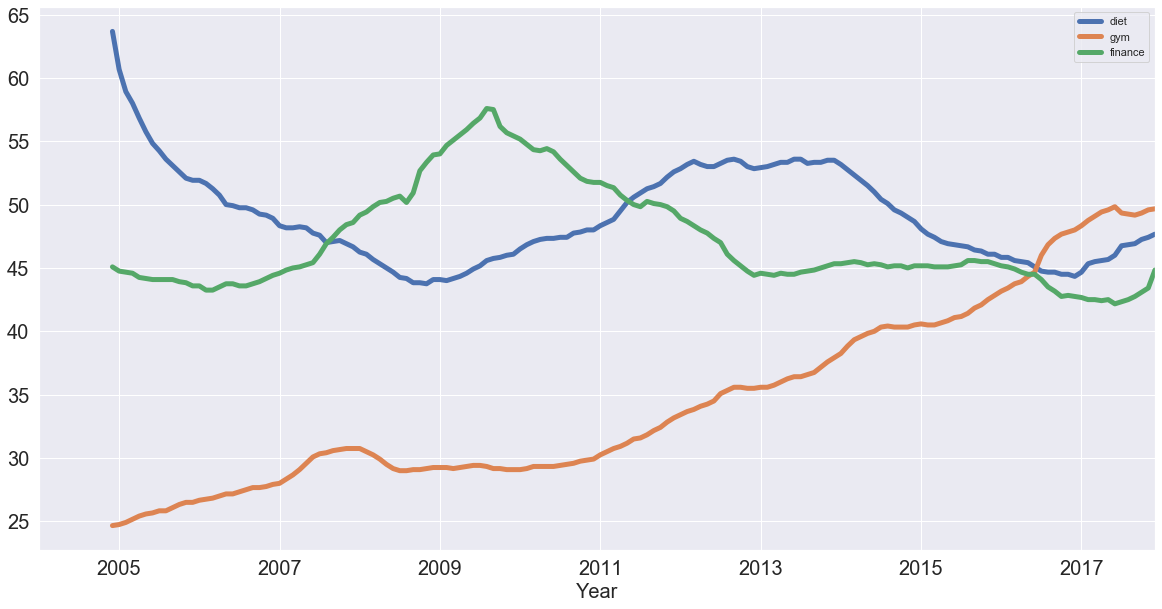

In [41]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean(),finance.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [48]:
# The above graph shows trends of 'diet','gym' as well as 'finance'

Now, to investigate seasonality, we will remove the trend by first order differencing

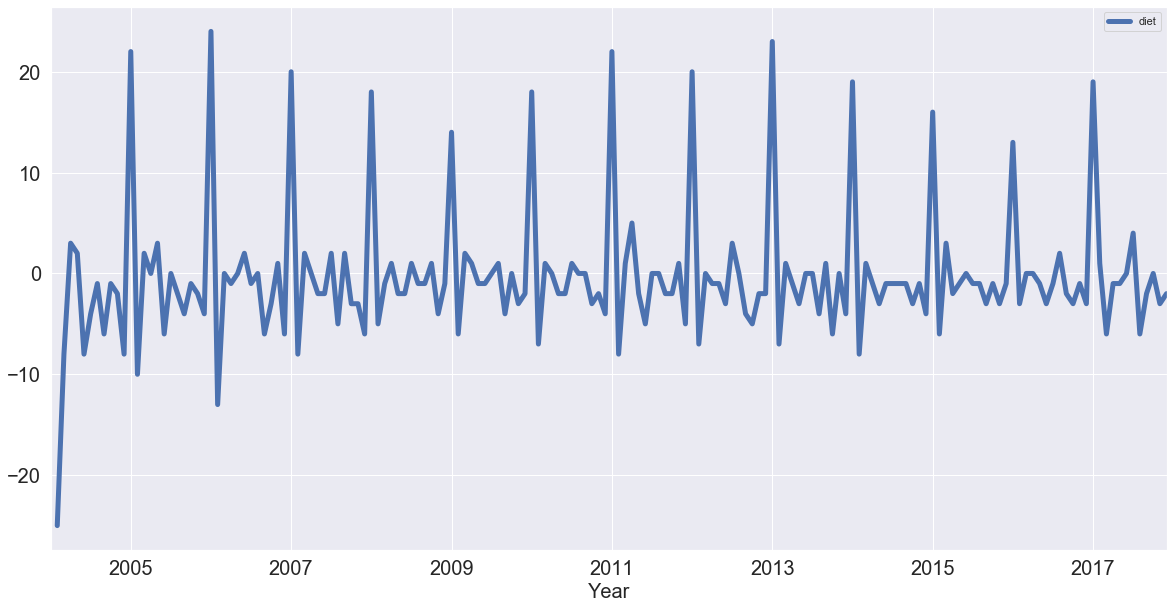

In [42]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

A spike of almost 20% can be seen every year in January

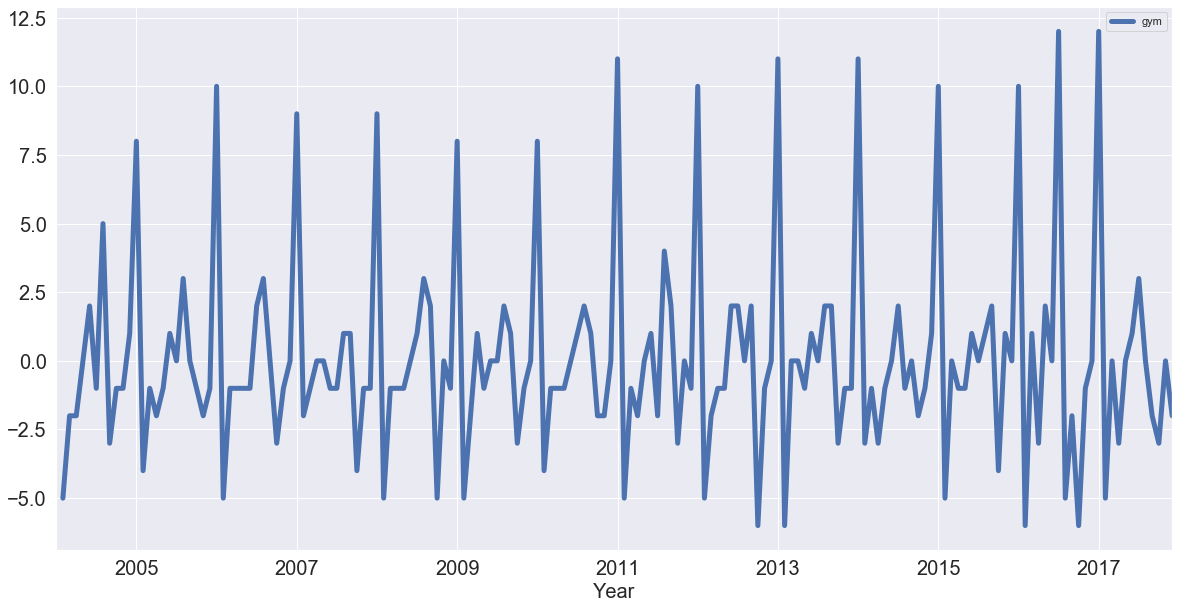

In [50]:
gym.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

A spike of almost 10% can be seen every year in January

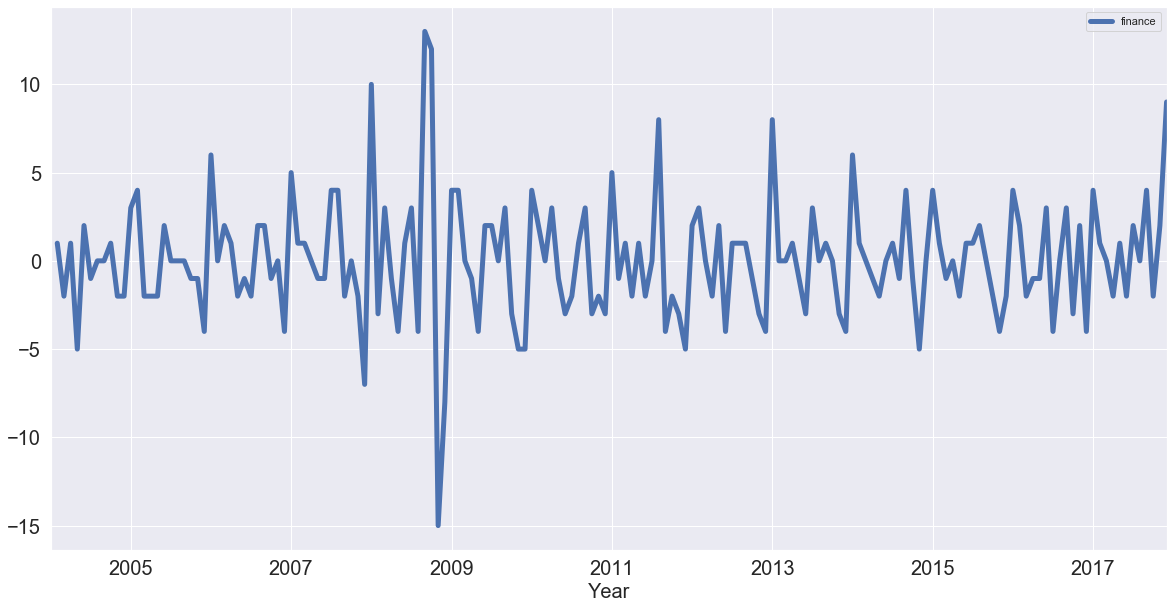

In [51]:
finance.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

A spike of almost 5% can be seen on an average every year in January

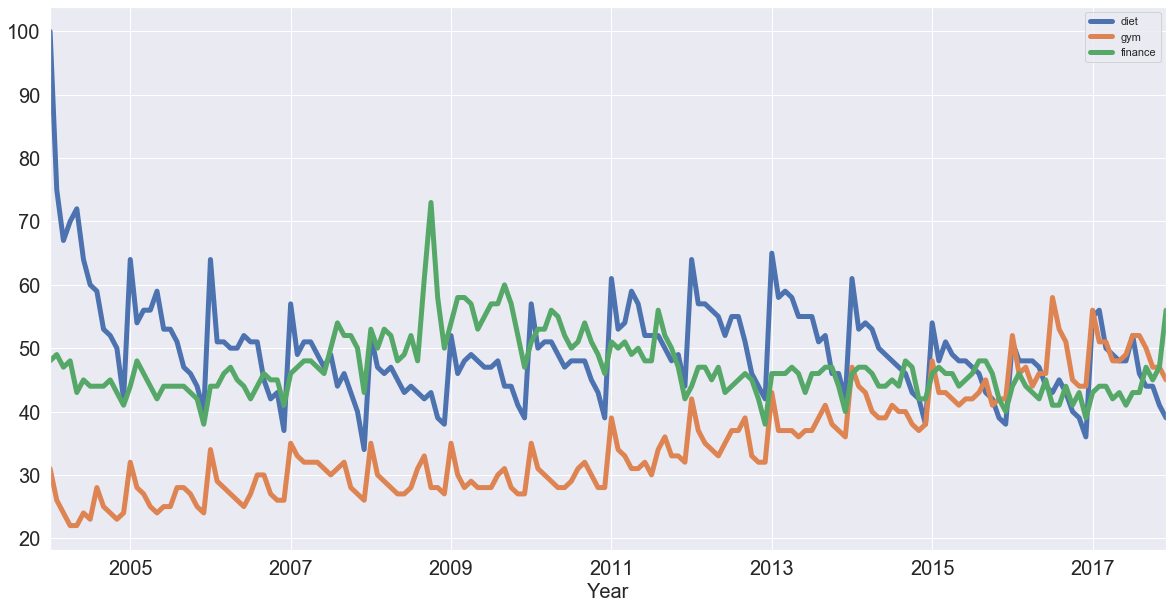

In [49]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);                                 #Doing the step again to have a general look

In [44]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


The correlation coefficients show that there is negative correlation between the diet and gym whereas the plot above shows that the seasonality is positively related while the trend is negatively related. Because of this confusion, we will plot the first order differences in the series and then find the correlation coefficient.

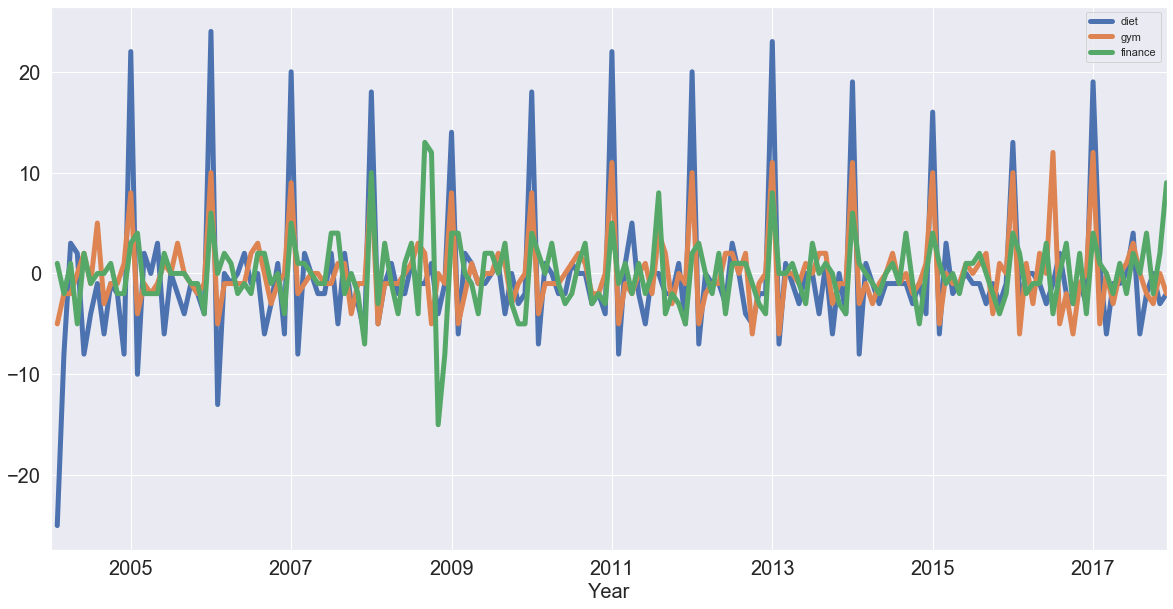

In [45]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [46]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


These are the correlation coefficients of the seasonality of the three components as the trend has been removed by first order differencing

Thus, it can be seen that seasonality of diet and gym have strong positive correlation, diet and finance have weak positive correlation and finance and gym also have very weak positive correlation

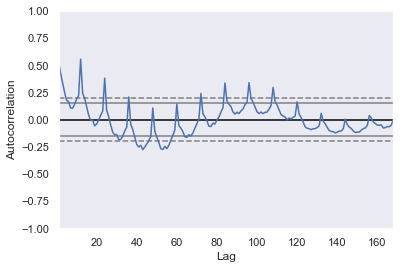

In [53]:
pd.plotting.autocorrelation_plot(diet);

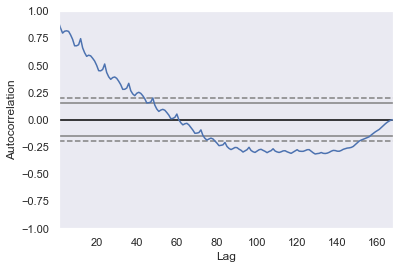

In [55]:
pd.plotting.autocorrelation_plot(gym);

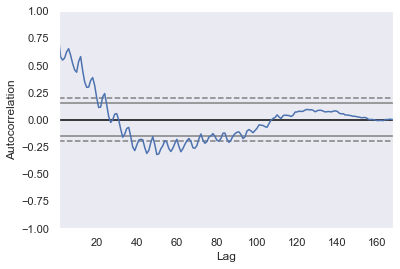

In [56]:
pd.plotting.autocorrelation_plot(finance);

The dotted line shows the statistical significance of the correlation. It can be seen that the 'diet' series is autocorrelated with itself at a lag of 12 months. Thus, diet follows periodic trend while gym and finance don't.